## Numerical solution of ODEs

*Material for this worksheet can be found in the AE2220-I lecture notes Chapter 8*

### Problem statement

Find the vector-valued function $u: \mathbb{R} \rightarrow \mathbb{R}^m$
satisfying the system of $m$ ODEs and initial conditions:
$$
\mathbf{u}'(t) = f(\mathbf{u}(t)), \qquad \mathbf{u}(0)=\mathbf{u}_0,
$$
where $f:\mathbb{R}^m\rightarrow \mathbb{R}^m$ and $\mathbf{u}_0\in \mathbb{R}^m$ is a constant.

All initial-value problems of the form
$$
y^{(m)}(t) = F(t, y, y', y'',\dots, y^{(m-1)})
$$
can be rewritten in the canonical form $\mathbf{u}'=f(\mathbf{u})$ by introducing auxillary variables, and therefore we consider only the canonical form in the following.

In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.labelsize': 18})
import numpy as np

In [33]:
def rk4(f, u, dt):
    """
    Runge-Kutta explicit 4-stage scheme - 1 step.

      f  - function defining ODE dy/dt = f(t,u), two arguments
      t  - time
      u  - solution at t
      dt - step size
    Return: approximation of y at t+dt.
    """
    k1 = f(u)
    k2 = f(u + dt*k1/2)
    k3 = f(u + dt*k2/2)
    k4 = f(u + dt*k3) 
    return u + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

#### Example #1: Mathematical pendulum

One of the most simple non-linear ODE is the pendulum equation without damping

$$\frac{d^2 \phi(t)}{dt^2} = \ddot{\phi} = - \frac{g}{l}\sin(\phi(t))$$

in which $\phi(t)$ is the deflection angle in time, $g$ the gravitational accelertion and $l$ the length of the pendulum. Using the auxillary variables

\begin{align*}
z_1 &= \phi \\
z_2 &= \dot{\phi} 
\end{align*}

the second order ODE can be transformed into a system of two first order ODEs

\begin{align*}
\dot{z_1} &= z_2 \\
\dot{z_2} &= - \frac{g}{l}\sin(z_1)
\end{align*}

Which can be solved numerically using the above defined Runge-Kutta algorithm.



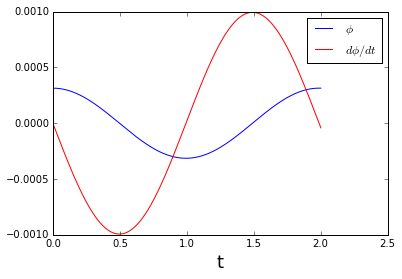

In [34]:
gravity          = 10
length           = 1
deflection_angle = 0.0001*np.pi

def f_pendulum_damped(state): 
    g0 = state[1]
    g1 = -gravity/length * np.sin(state[0])
    return np.array([g0,g1])

def init_pendulum_damped():
    return [deflection_angle, 0]
    
    
M = 2
N, deltat = 2001, 0.001
Tmax = N * deltat
t = np.linspace(0,Tmax,N)
u = np.zeros((N, M))
u.shape
u[0,:] = init_pendulum_damped()     
for i in range(N-1):
    u[i+1,:] = rk4(f_pendulum_damped, u[i], deltat)
    

plt.figure()
plt.plot(t, u[:,0], '-b', label=r'$\phi$')
plt.plot(t, u[:,1], '-r', label=r'$d\phi/dt$')
plt.xlabel('t')
plt.legend(loc='best')

If the pendulum is only deflected by a small angle $\phi_0$, the non-linear term can be approximated by $\sin(\phi) \approx \phi$ and the governing equation reduces to a linear ODE

$$\ddot{\phi} = - \frac{g}{l}\phi(t)$$

with the analytical solution

$$\phi(t) = \Phi \, \sin(\sqrt{\dfrac{g}{l}} t + \phi_m)$$

in which $\Phi$ is the deflection angle and $\phi_m$ can be determined from the initial condition (here: $\phi_m = \pi/2$). A comparison of the analytical solution with the numerical is shown below.


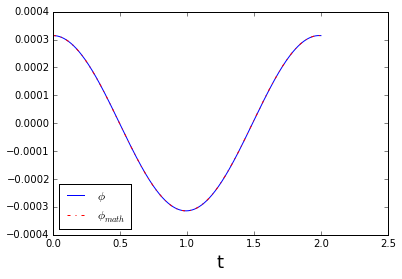

In [35]:
u_math = deflection_angle * np.sin(np.sqrt(gravity/length)*t+np.pi/2)  

plt.figure()
plt.plot(t, u[:,0], '-b', label=r'$\phi$')
plt.plot(t, u_math, '-.r', label=r'$\phi_{math}$')
plt.xlabel('t')
plt.legend(loc='best')

**Exercise 1:
(a)  What happens if the initial deflection angle is not small, e.g. $\phi_0=\pi/4$? How do you explain the difference compared to the analytical solution?**

In [1]:
### CODE - TO DO: Use the above code an modify it according to the exercise. Plot the result.

**(b)  Consider the motion of a planar pendulum under friction. The equation of motion reads
$$\frac{d^2 \phi}{dt^2} = - \frac{g}{l}\sin(\phi) - c\frac{d \phi}{dt}$$
with $c$ as the friction coefficient. This 2nd order ODE can be transformed into a system of 1st order ODEs analogously to the example of the mathematical pendulum (pendulum without damping/friction)
\begin{align*}
\dot{z_1} &= z_2 \\
\dot{z_2} &= - \frac{g}{l}\sin(z_1) - c z_2
\end{align*}
Solve the system numerically using the above defined Runge-Kutta explicit 4-stage scheme function $rk4()$. Parameter values are $g=9.81$, $l=1$, $c=0.2$ and the initial conditions are $\phi_0=0.2$ and $\frac{d \phi}{dt}\big|_0=0.0$. Use $dt=0.01$ and run until $T=100$.
**

In [2]:
### CODE - TODO: Use the above code an modify it according to the exercise. Plot the result.


### Stability of the ODE

For ODEs we distinguish two kinds of stability. First, the stability of the method used to solve the ODE numerically. Second, the stability of the ODE itself. In order to assess the latter the dynamics of the ODE at so-called equilibrium points or fixed points is analyzed (see e.g. chapter 8.5.1 of the reader). 

Let's take for example the equation of motion of a planar pendulum under friction (damped motion) from above. The equilibrium points are the points where the time derivatives vanish, i.e. 

\begin{align*}
\dot{z_1} &= z_2 = 0\\
\dot{z_2} &= - \frac{g}{l}\sin(z_1) - c z_2 = 0
\end{align*}

Thus, the fixed points are $(z_1^*, z_2^*) = (n\pi, 0)$ with $n \in \mathbb{Z}$. The question is if these fixed points are stable or unstable. The Jacobian matrix evaluated at these points determines the stability properties. 
Defining $\dot{z_1} = f(z_1, z_2)$ and $\dot{z_2} = g(z_1, z_2)$ the Jacobian reads

$$
J = 
\begin{pmatrix}
\frac{d f}{d z_1} & \frac{d f}{d z_2} \\
\frac{d g}{d z_1} & \frac{d g}{d z_2} 
\end{pmatrix}_{(z_1^*, z_2^*)} 
= \begin{pmatrix}
0 & 1 \\
-\frac{g}{l}\cos(z_1) & -c
\end{pmatrix}_{(z_1^*, z_2^*)} 
$$

For the sake of simplicity we focus on $(z_1^*, z_2^*) = (2n\pi, 0)$ and assume $g/l=1$ so that

$$
J = 
\begin{pmatrix}
0 & 1 \\
-1 & -c
\end{pmatrix}
$$

The eigenvalues of the matrix are $$ \lambda_{1,2} = \frac{-c \pm \sqrt{c^2 - 4}}{2}$$. 

If only one eigenvalue has a positive real part, the fixed point is unstable. If all eigenvalues have negative real part, the fixed point is stable. 

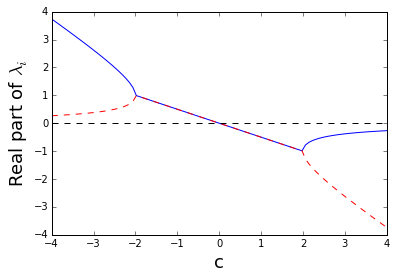

In [38]:
import cmath

def eig(ci):
    lambda_1 = np.real((-ci + cmath.sqrt(ci**2. - 4.))/2.)
    lambda_2 = np.real((-ci - cmath.sqrt(ci**2. - 4.))/2.)
    return lambda_1, lambda_2


c = np.linspace(-4,4,100)

lambda_1 = np.zeros(shape=c.shape)
lambda_2 = np.zeros(shape=c.shape)
for i,ci in enumerate(c):
    lambda_1[i], lambda_2[i]  = eig(ci)

    
plt.figure()
plt.plot(c, lambda_1, '-b', label=r'$\lambda_1$')
plt.plot(c, lambda_2, '--r', label=r'$\lambda_2$')
plt.ylabel('Real part of $\lambda_i$')
plt.xlabel('c')
plt.axhline(y=0.,color='k',ls='dashed')
#plt.legend(loc='best')


The figure shows the real part of $\lambda_i$ as a function of $c$. One can see that if $c>0$ all real parts of $\lambda_{1,2}$ are all negative, i.e. stable fixed points.

**Exercise 2: (a)  Consider again the motion of a planar pendulum under friction from above and solve the problem again but now with $c=-0.1$ and $g/l=1$. Discuss what you observe for $T_{max} = 10$ and $T_{max} = 100$?**


In [3]:
### TO DO: Use your code from exercise 1 (b) and modify it according to the exercise. Plot the result.

### Stability of time-stepping schemes

If the ODE is stable the numerical stability of time-stepping method depends on the step size. Consider the example of a simple linear 1st order ODE 

$$
\dot{y} = \alpha y
$$

with the inital condition $y(0) = 1$. Let's solve this ODE using forward Euler-Cauchy. 

Which is the biggest time step $dt$ we can chose? The stability region of the forward Euler-Cauchy is defined as the set

$$ \{z \in \mathbb{C}: |z+1|<1  \} $$


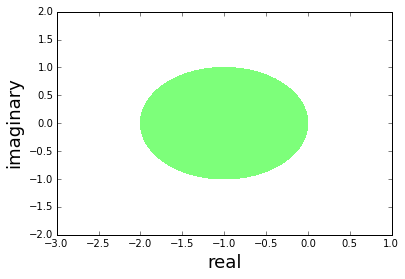

In [40]:
X, Y = np.meshgrid(np.linspace(-3,1,101), np.linspace(-2,2))
Z = X + Y * 1j
plt.figure()
plt.contourf(X, Y, abs(1. + Z), levels=[0,1.],
             colors=None, extend='lower')
plt.xlabel('real')
plt.ylabel('imaginary')
#plt.legend()

All points within the green circle are stable. In the above example we have $z=dt*\alpha$. The equation can be solved numerically with a time step $dt=0.1$

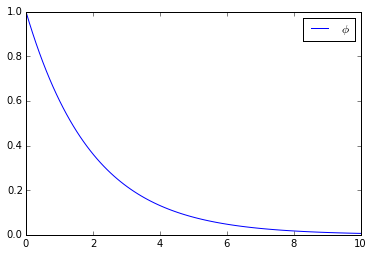

In [41]:
def forward_euler(alpha, u, dt):
    return u + dt*alpha*u


alpha = -0.5
M = 1
N, deltat = 100, 0.1
Tmax = N * deltat
u = np.zeros((N, M))
u[0] = [1]     # Initial condition
for i in range(N-1):
    u[i+1] = forward_euler(alpha, u[i], deltat)

t = np.linspace(0,Tmax,N)    
    
plt.figure()
plt.plot(t, u, '-b', label=r'$\phi$')
plt.legend()


**(b)  Find a $dt$ so that the solution is outside of the stability range.**


In [4]:
### TO DO: Use the above code an modify it according to the exercise. Plot the result.


### Additional example: Orbital mechanics (** - not examined)

Consider now $M$ point-masses mutually gravitating in 2d, with locations $(x_i,y_i) = \mathbf{x}_i \in \mathbb{R}^2$ and masses $m_i$.  Mass $j$ exerts a force due to gravity on mass $i$ of:
$$
F_{ij} = \frac{G m_i m_j}{r^2}\cdot \frac{\mathbf{x}_j-\mathbf{x}_i}{|\mathbf{x}_j-\mathbf{x}_i|}, \qquad r := |\mathbf{x}_j - \mathbf{x}_i|
$$
i.e. inverse-square law along the line connecting the masses.  Newton II applies:
$$
m_i \mathbf{x}_i'' = \sum_{j=0,j\neq i}^{M-1} F_{ij} =: F_i = (F_i^x, F_i^y)
$$
Again in canconical form $\mathbf{u}'=f(\mathbf{u})$, with
$$
\mathbf{u} = \begin{pmatrix} x_0,\dots x_{M-1}, y_0,\dots y_{M-1}, x'_0,\dots x'_{M-1}, y'_0,\dots y'_{M-1} \end{pmatrix}
$$
and
$$
f(\mathbf{u}) = \begin{pmatrix} x'_0,\dots x'_{M-1}, y'_0,\dots y'_{M-1},
F_0^x,\dots,F_{M-1}^x, F_0^y,\dots,F_{M-1}^y\end{pmatrix}.
$$
To model the Earth-moon system, we need various constants:
$$
G = 6.67384\times 10^{-11}\,\mathrm{N}\cdot(\mathrm{m/kg})^2\\
$$
$$
m_\mathrm{earth} = 5.972\times 10^{24}\,\mathrm{kg},\quad m_\mathrm{moon} = 7.348 \times 10^{22}\,\mathrm{kg},\quad m_\mathrm{apollo}\simeq 30\times 10^3\,\mathrm{kg}.
$$
Moon's distance and velocity relative to Earth:
$$
x_\mathrm{moon}= 384400.0\times 10^3\,\mathrm{m},\quad y'_\mathrm{moon} = 1.023\times 10^3\,\mathrm{m/s}.
$$
To make the center-of-mass of the combined system fixed, choose a cancelling initial velocity for the Earth:
$$
\quad y'_\mathrm{earth} = -y'_\mathrm{moon} \frac{m_\mathrm{moon}}{m_\mathrm{earth}}
$$

In [43]:
n_body = 2
M_multibody = 4 * n_body
masses = [5.972e24,      # Mass of earth
         1.e24,#7.34767309e22, # Mass of moon
         30.0e3]        # ~ mass of Apollo
G = 6.67384e-11     # Universal graviational constant

def f_multibody(u):
    x    = u[0:n_body]
    y    = u[n_body:2*n_body]
    xdot = u[2*n_body:3*n_body]
    ydot = u[3*n_body:]
    f = np.zeros((n_body,4))
    f[:,0] = xdot
    f[:,1] = ydot
    for i in range(n_body):
        for j in range(n_body):
            if i != j:
                r = np.sqrt( (x[j]-x[i])**2 + (y[j]-y[i])**2 )
                f[i,2] += G*masses[j]*(x[j]-x[i])/r**3
                f[i,3] += G*masses[j]*(y[j]-y[i])/r**3
    return f.T.flatten()

def jac_multibody(u):
    x    = u[0:n_body]
    y    = u[n_body:2*n_body]
    xdot = u[2*n_body:3*n_body]
    ydot = u[3*n_body:]
    jac = np.zeros((M_multibody,M_multibody))
    
    jac[0:2*n_body,2*n_body:] = np.eye(2 * n_body)
    for i in range(n_body):
        for j in range(n_body):
            if i != j:    
                r = np.sqrt( (x[j]-x[i])**2 + (y[j]-y[i])**2 )
                dFdxj = G*masses[j]*(np.eye(2)/r**3 - 
                          3./r**5*np.array([[(x[j]-x[i])**2,(x[j]-x[i])*(y[j]-y[i])],
                                            [(x[j]-x[i])*(y[j]-y[i]),(y[j]-y[i])**2]]))
                dFdxi = G*masses[j]*(-np.eye(2)/r**3 - 
                          3./r**5*np.array([[(x[j]-x[i])**2,(x[j]-x[i])*(y[j]-y[i])],
                                            [(x[j]-x[i])*(y[j]-y[i]),(y[j]-y[i])**2]]))                
                jac[2*n_body+i,j]        += dFdxj[0,0]
                jac[2*n_body+i,j]        += dFdxj[0,1]
                jac[2*n_body+i,n_body+j] += dFdxj[0,1]
                jac[3*n_body+i,j]        += dFdxj[1,0]
                jac[3*n_body+i,n_body+j] += dFdxj[1,1]
    return jac

x_moon = 384400.0e3

# Calculate velocity of earth/moon resulting in a circular orbit
# about the Earth-moon CoM.
r_moon  = masses[0]*x_moon/(masses[0]+masses[1])
r_earth = masses[1]*x_moon/(masses[0]+masses[1])
T = np.sqrt(4.*np.pi**2*x_moon**3 / (G*(masses[0]+masses[1]))) # Orbital period
vel_moon  = 2.*np.pi*r_moon/T
vel_earth = -2.*np.pi*r_earth/T

def init_multibody():
    theta = 25.*np.pi/180
    return [        0, x_moon,     -x_moon/10*np.cos(theta),    # x-position (Earth at origin)
                    0,      0,     -x_moon/10*np.sin(theta),
                    0,      0,     1.6*2600.*-np.sin(theta),    # x-vel (center-of-mass stationary)
            vel_earth,   vel_moon, 1.6*2600.*np.cos(theta)] 

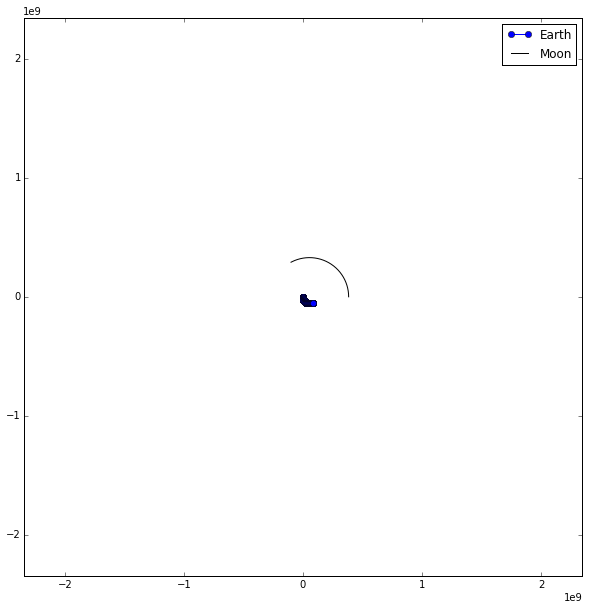

In [44]:
N, deltat = 200*60, 60.
Tmax = N * deltat
u = np.zeros((N, M_multibody))
u[0,:] = np.array(init_multibody()).reshape(4,3)[:,:2].reshape(8)     # Initial condition
for i in range(N-1):
    u[i+1,:] = rk4(f_multibody, u[i], deltat)
plt.figure(figsize=(10,10))
plt.plot(u[:,0], u[:,0+n_body], '-ob', label='Earth')
plt.plot(u[:,1], u[:,1+n_body], '-k', label='Moon')
#plt.plot(u[:,2], u[:,2+n_body], '-r', label='Apollo')
plt.xlim(-6.1*x_moon, 6.1*x_moon)
plt.ylim(-6.1*x_moon, 6.1*x_moon)
plt.legend()